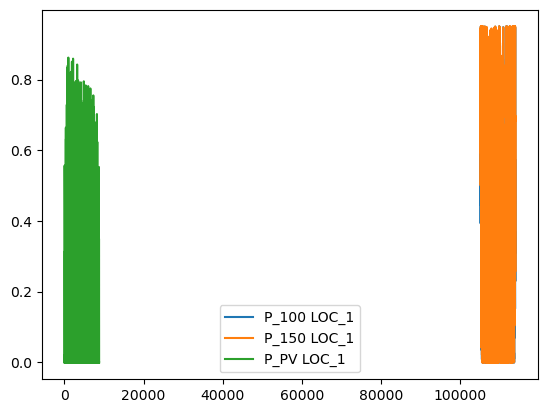

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

# Read and convert to datetime the CSV generation files
df_P_100 = pd.read_csv("P_w_100.csv")
df_P_150 = pd.read_csv("P_w_150.csv")
df_P_PV = pd.read_csv("P_PV.csv")

df_P_100['time'] = pd.to_datetime(df_P_100['time'], utc=True)
df_P_150['time'] = pd.to_datetime(df_P_150['time'], utc=True)
df_P_PV['time'] = pd.to_datetime(df_P_PV['time'], utc=True)

cap_inst = 50
sel_year = 2012
locs_w = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.1', 'LOC_5.1', 'LOC_6', 'LOC_7', 'LOC_8.1', 'LOC_9', 'LOC_10']
locs_s = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.2', 'LOC_5.2', 'LOC_6', 'LOC_7', 'LOC_8.2', 'LOC_9', 'LOC_10']

# Function to extract time series data for a specific year and locations
def out_year_timeseries(df, sel_year, locations):
    df_year = df[df['time'].dt.year == sel_year]
    time_series_data = pd.DataFrame()
    for location in locations:
        time_series_data[location] = df_year[location]
    return time_series_data

# Extract time series data for P_100, P_150, and P_PV
time_series_data_100 = out_year_timeseries(df_P_100, sel_year, locs_w)
time_series_data_150 = out_year_timeseries(df_P_150, sel_year, locs_w)
time_series_data_PV = out_year_timeseries(df_P_PV, sel_year, locs_s)

# Dataframe for capacity factors (CF)
CF_100_data = time_series_data_100.div(cap_inst)
CF_150_data = time_series_data_150.div(cap_inst)
CF_PV_data= time_series_data_PV.div(cap_inst)
# Plotting example
fig, ax = plt.subplots()
ax.plot(time_series_data_100.index, time_series_data_100['LOC_1'], label='P_100 LOC_1')
ax.plot(time_series_data_150.index, time_series_data_150['LOC_1'], label='P_150 LOC_1')
ax.plot(time_series_data_PV.index, time_series_data_PV['LOC_1'], label='P_PV LOC_1')
ax.legend()
plt.show()
